<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/arima_sarima_sarimax_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UN ARIMA EN PYTHON

In [80]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

In [81]:
df.head()

,value
0,88
1,84
2,85
3,85
4,84


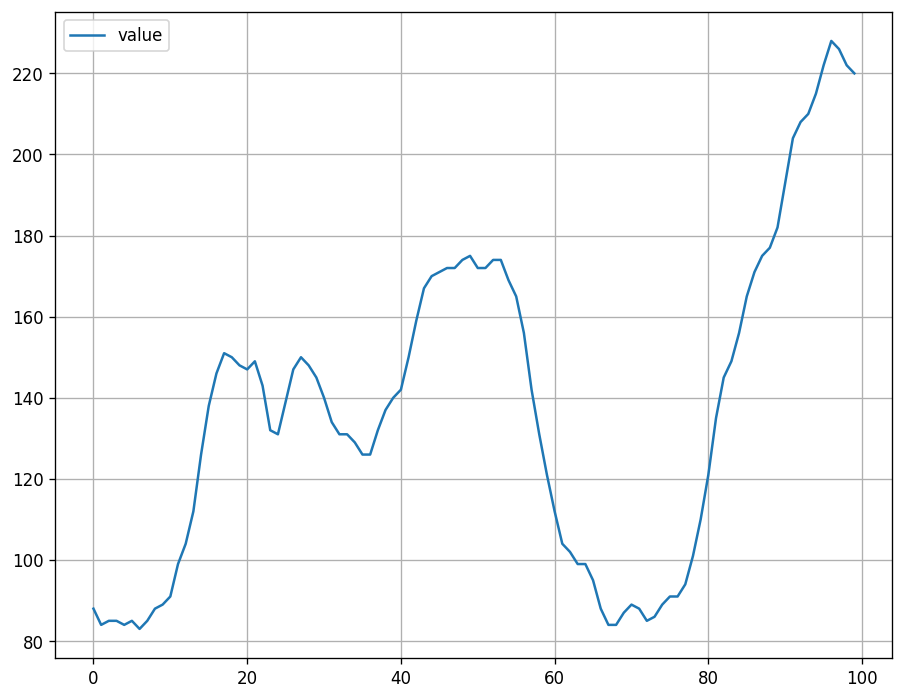

In [5]:
df.plot()
plt.grid()

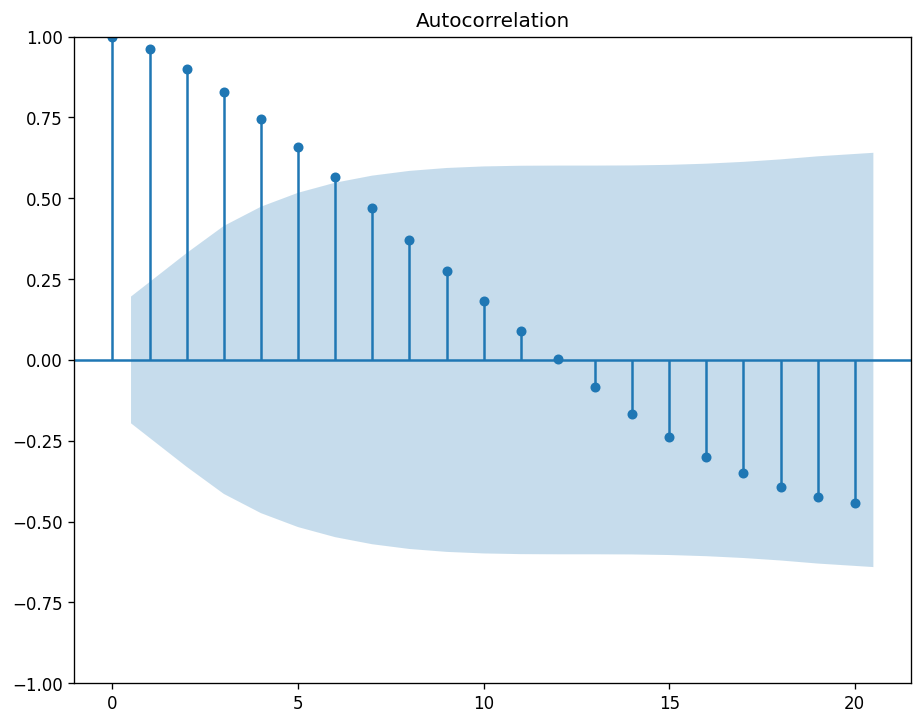

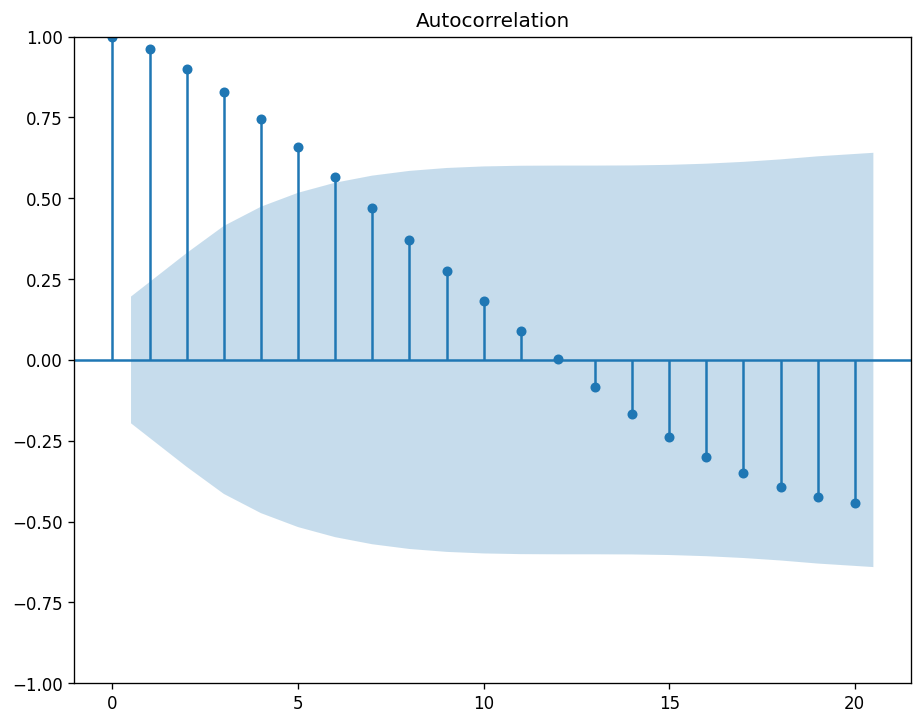

In [6]:
plot_acf(df.value)

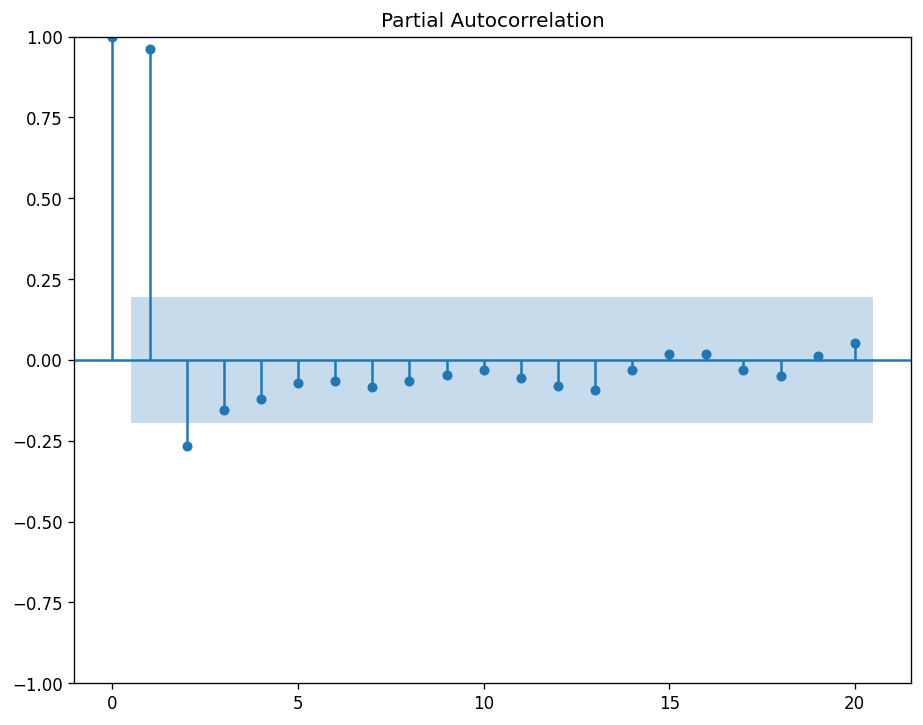

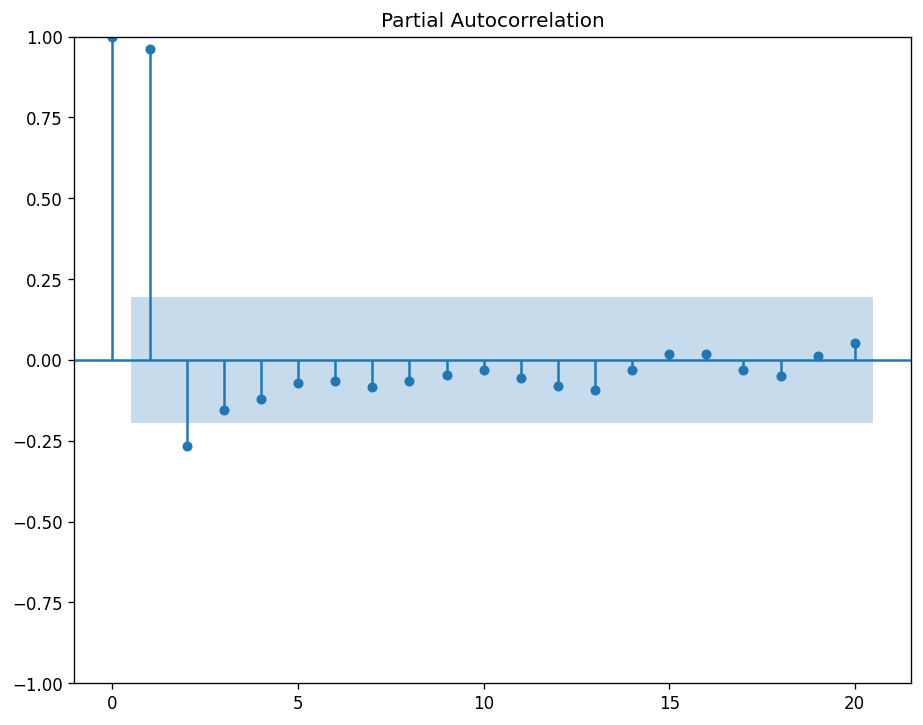

In [8]:
plot_pacf(df['value'])

In [22]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.464240
p-value: 0.124419


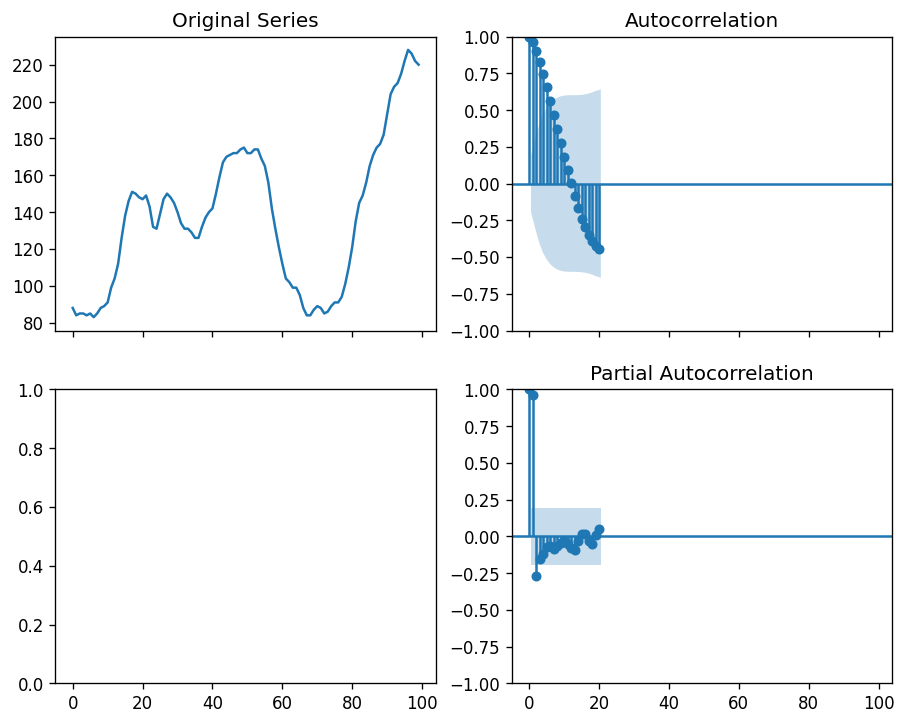

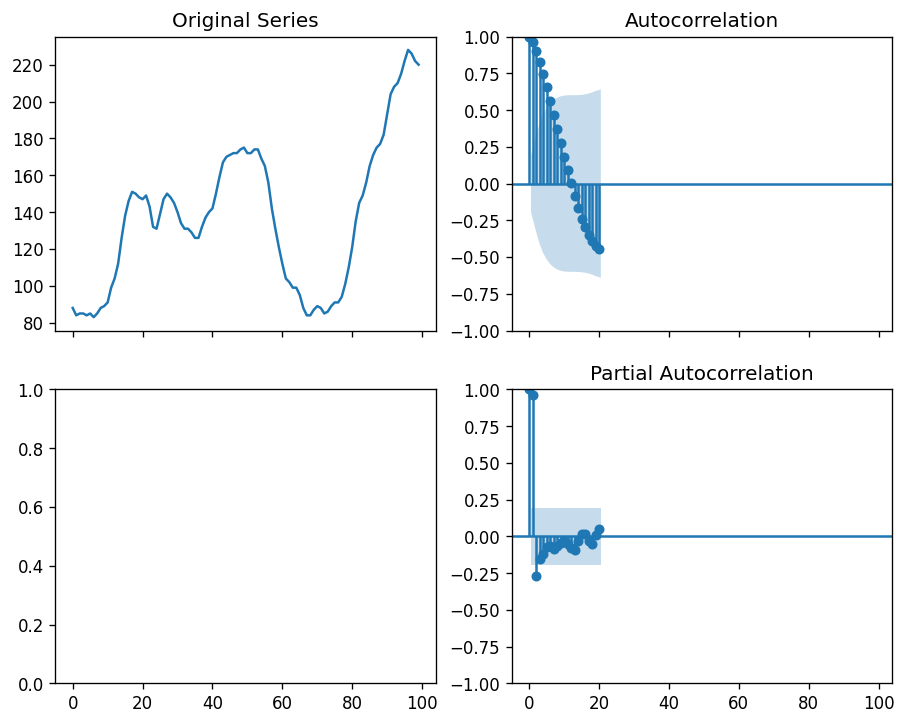

In [14]:
# Original Series
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])
plot_pacf(df.value, ax=axes[1, 1])

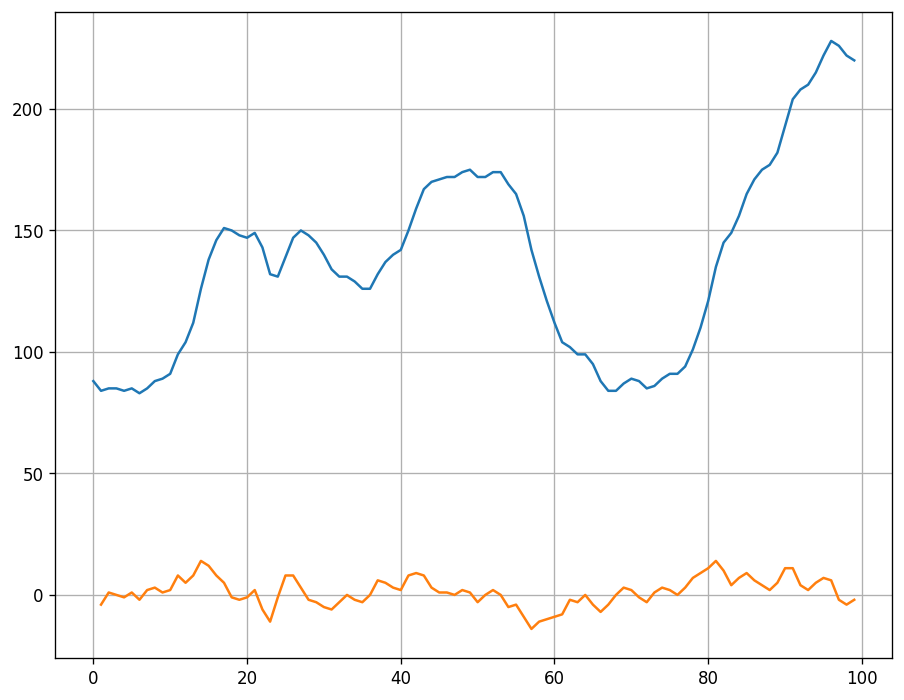

In [19]:
df.value.plot()
df.value.diff().plot()
plt.grid()

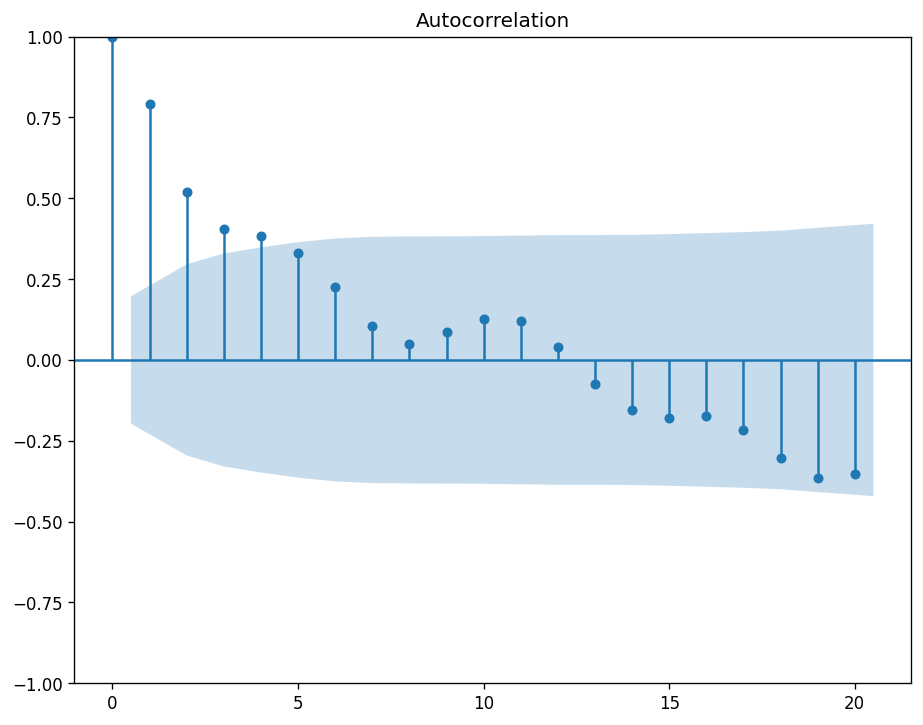

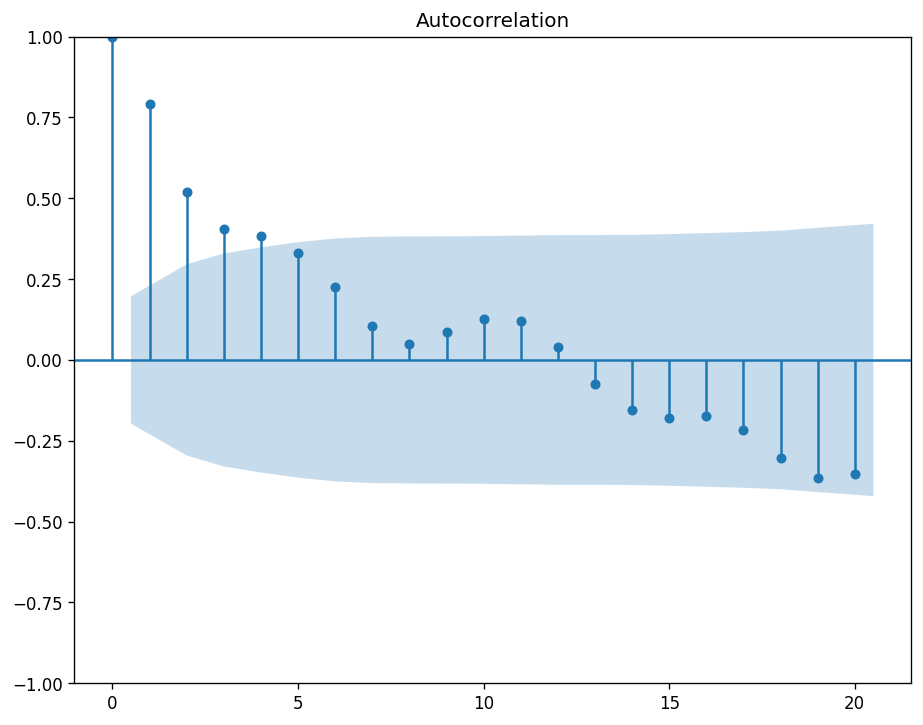

In [20]:

plot_acf(df.value.diff().dropna())

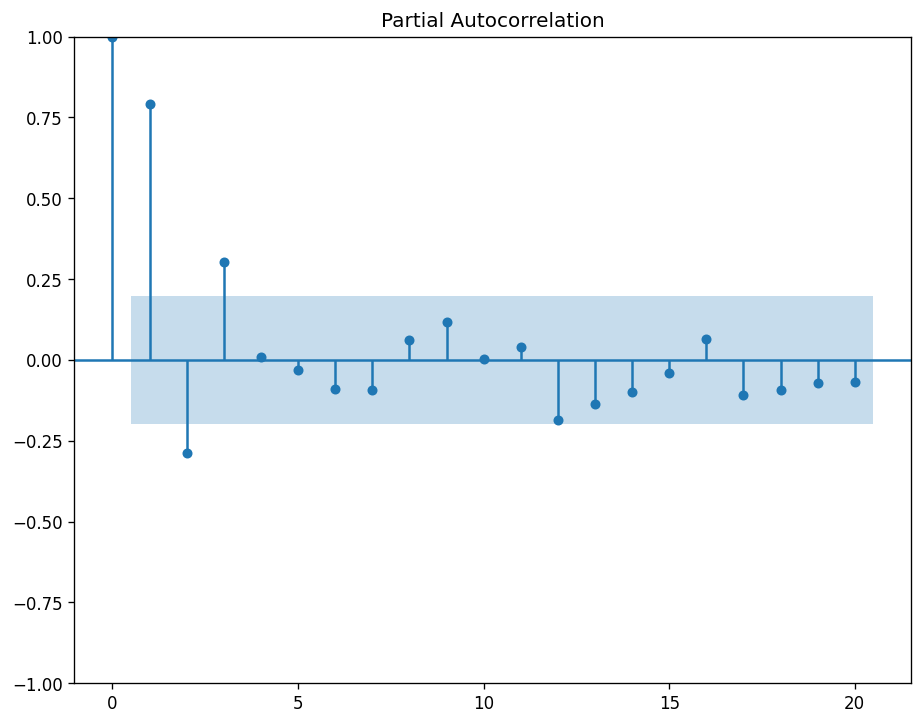

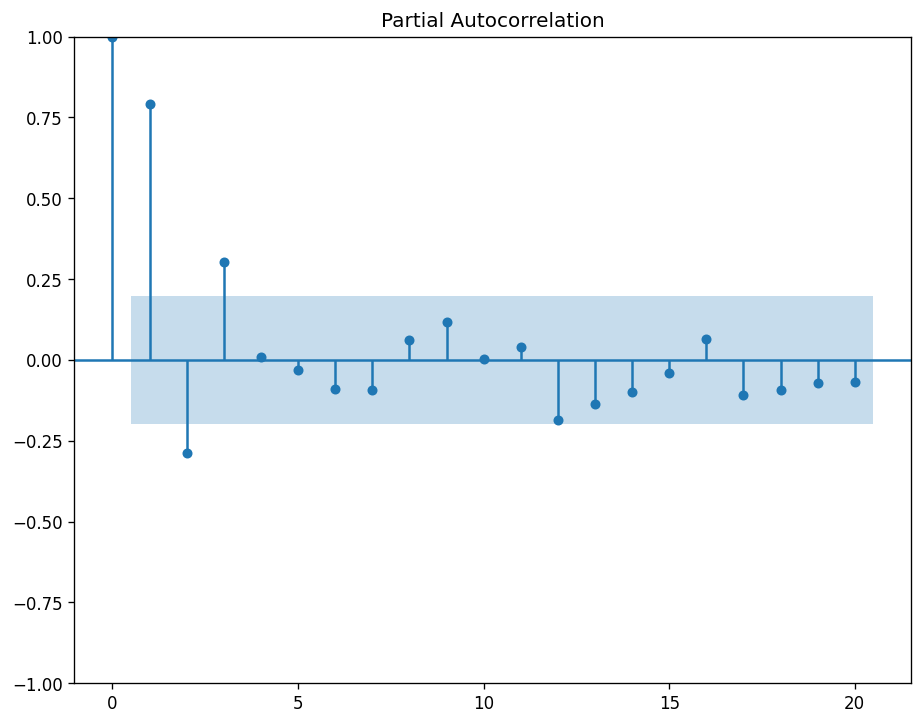

In [21]:
plot_pacf(df.value.diff().dropna())

In [23]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.722238
p-value: 0.070268


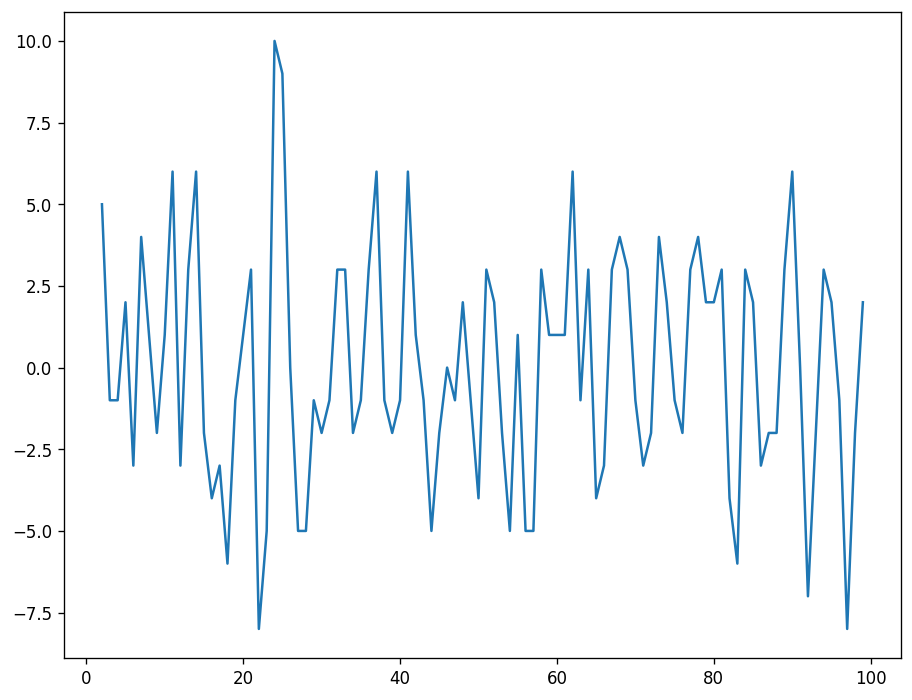

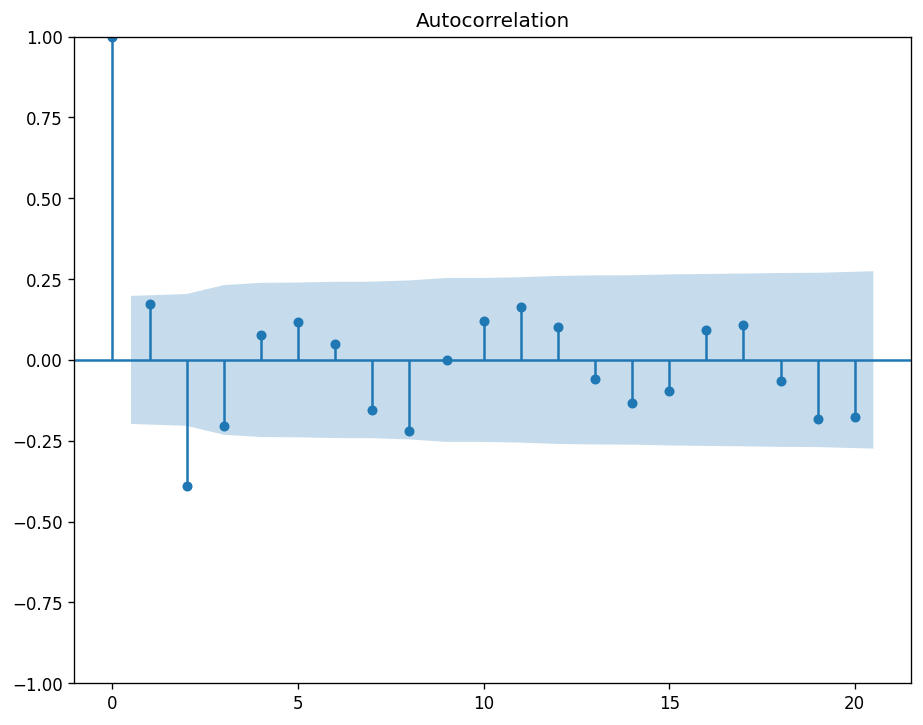

In [26]:
# 2nd Differencing
df.value.diff().diff().plot()
plot_acf(df.value.diff().diff().dropna())

plt.show()

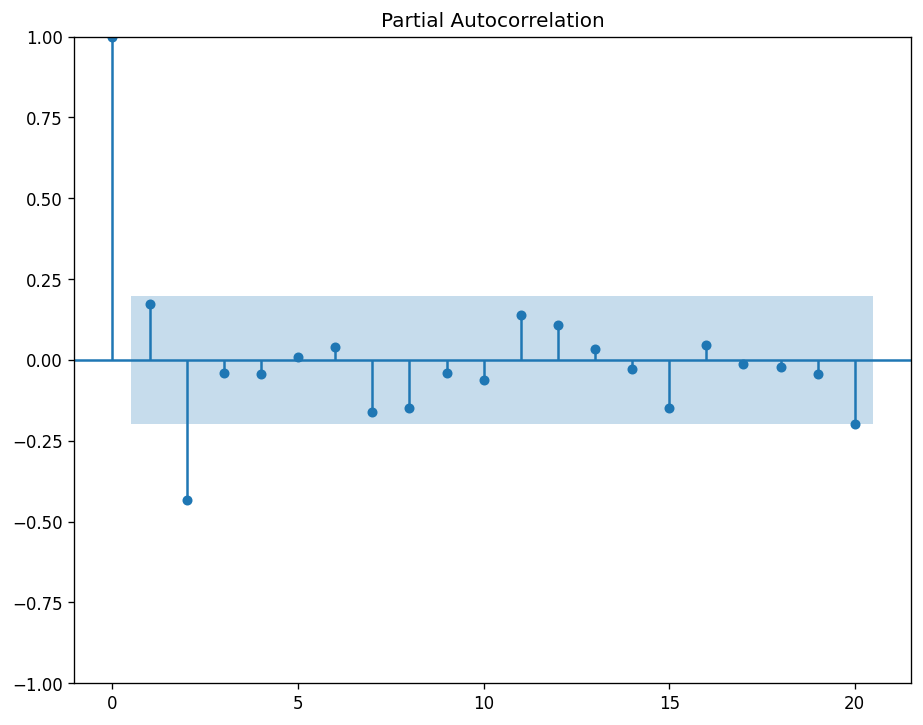

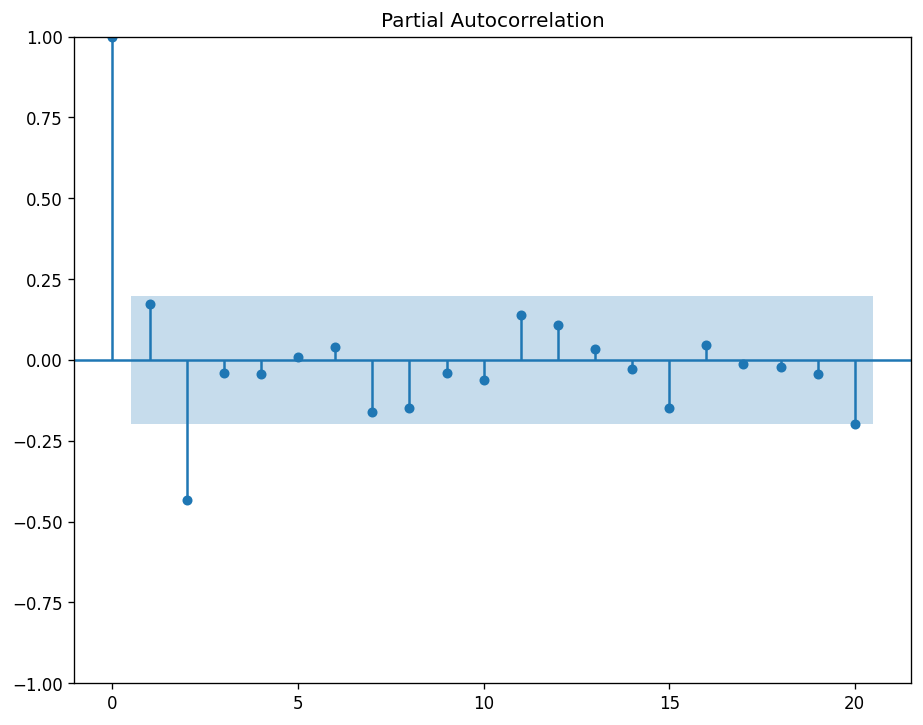

In [27]:
plot_pacf(df.value.diff().diff().dropna())

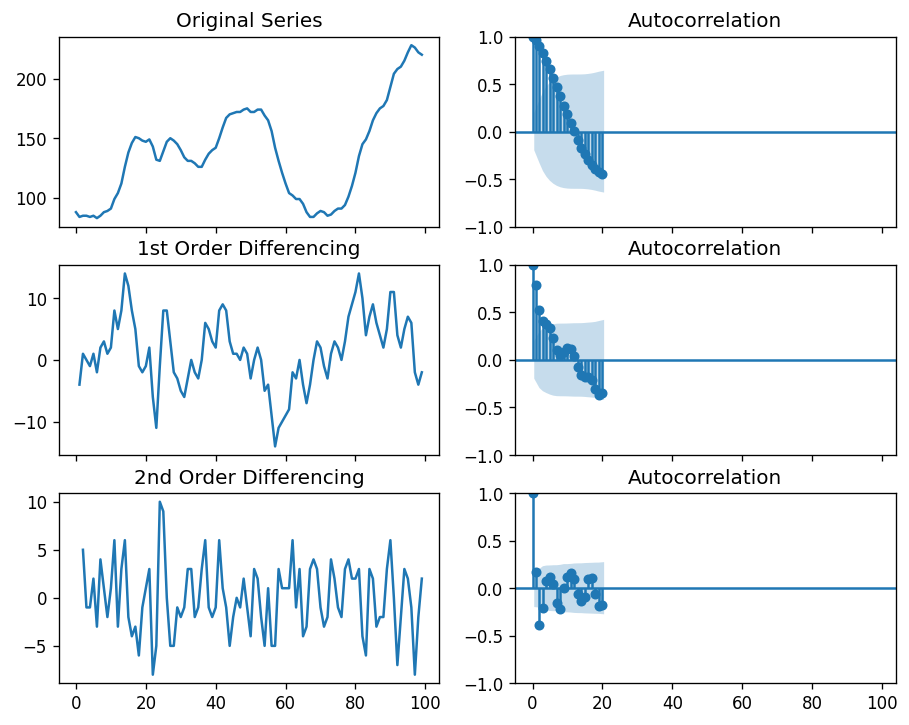

In [28]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [30]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.9 MB/s eta 0:00:00


In [31]:
from pmdarima.arima.utils import ndiffs
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
y = df.value

## Adf Test
ndiffs(y, test='adf')

2

In [32]:
# KPSS test
ndiffs(y, test='kpss')

0

In [33]:
# PP test:
ndiffs(y, test='pp')

2

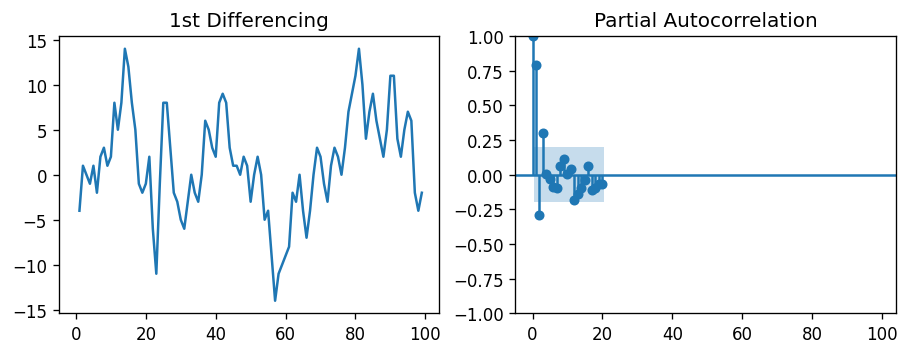

In [34]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

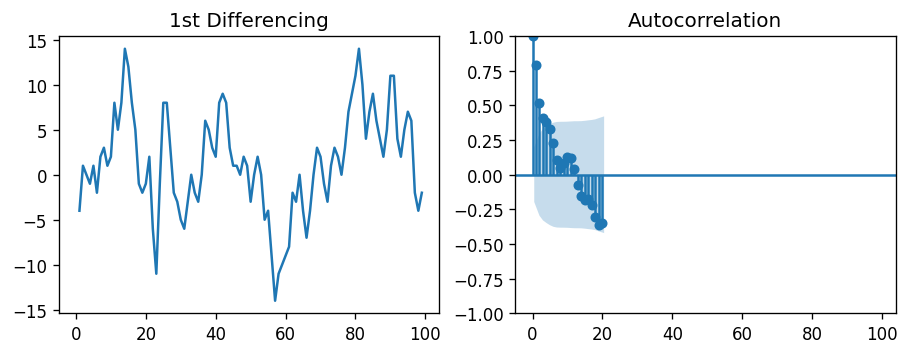

In [35]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [41]:
# 1,1,2 ARIMA Model
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -254.126
Date:                Mon, 23 Oct 2023   AIC                            516.253
Time:                        02:48:01   BIC                            526.633
Sample:                             0   HQIC                           520.453
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6976      0.130      5.365      0.000       0.443       0.952
ma.L1          0.4551      0.169      2.699      0.007       0.125       0.786
ma.L2         -0.0664      0.157     -0.424      0.6

In [43]:
# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -254.150
Date:                Mon, 23 Oct 2023   AIC                            514.300
Time:                        02:49:31   BIC                            522.086
Sample:                             0   HQIC                           517.450
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6504      0.090      7.258      0.000       0.475       0.826
ma.L1          0.5256      0.088      5.994      0.000       0.354       0.697
sigma2         9.7934      1.405      6.970      0.0

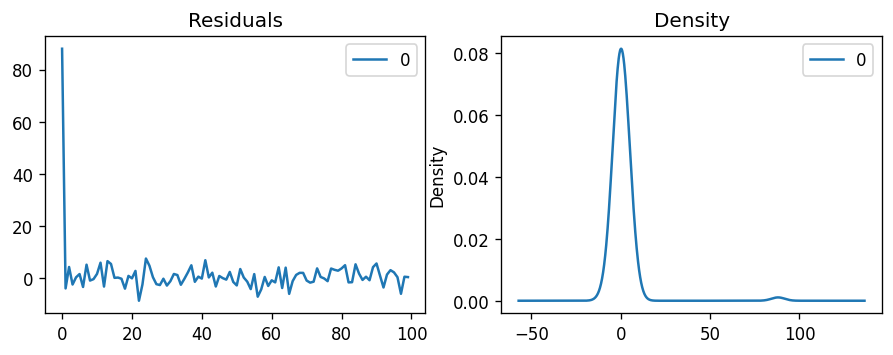

In [44]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<Axes: >

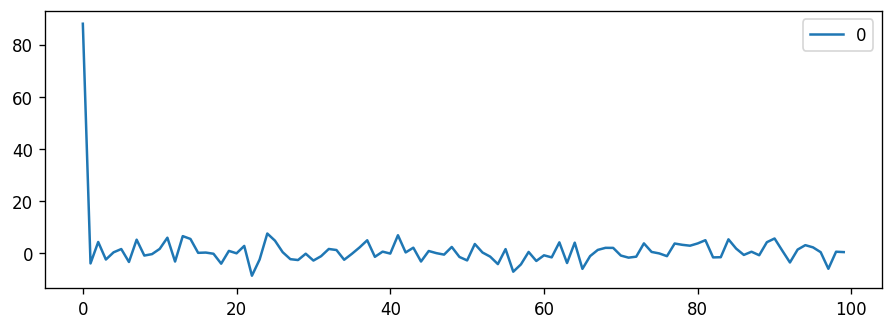

In [45]:
residuals.plot()

In [46]:
np.mean(residuals)

0    1.16745
dtype: float64

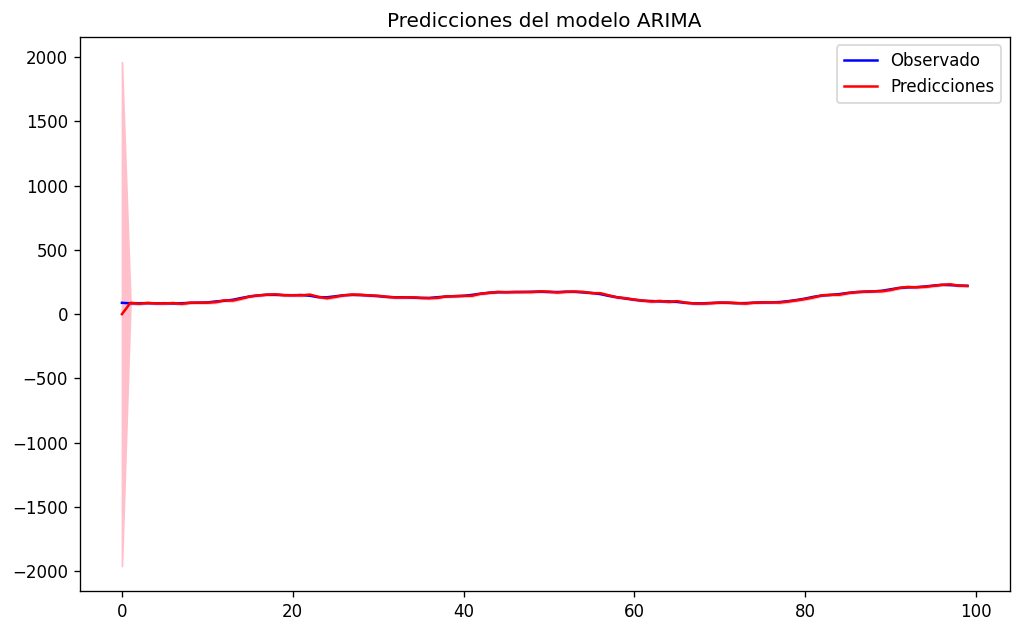

In [48]:
# Realizar predicciones
predictions = model_fit.get_prediction(dynamic=False)

# Obtener intervalos de confianza
pred_conf = predictions.conf_int()

# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(df.value, label='Observado', color='blue')
plt.plot(predictions.predicted_mean, label='Predicciones', color='red')

# Rellenar el área entre los intervalos de confianza
plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='pink')

plt.title('Predicciones del modelo ARIMA')
plt.legend()
plt.show()

In [49]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:85]
test = df.value[85:]

In [51]:
# Build Model
# model = ARIMA(train, order=(3,2,1))
model = ARIMA(train, order=(1, 1, 1))
fitted = model.fit()

In [71]:
result=fitted.forecast(15,alpha=0.05)

In [54]:
# Realizar predicciones
forecast = model_fit.get_forecast(steps=15, alpha=0.05)  # 95% confianza

# Obtener el marco de resumen de las predicciones
forecast_summary = forecast.summary_frame()

# Imprimir las predicciones y los intervalos de confianza
print(forecast_summary)

value        mean    mean_se  mean_ci_lower  mean_ci_upper
100    218.880504   3.129441     212.746913     225.014095
101    218.152418   7.494225     203.464007     232.840828
102    217.678892  11.868378     194.417299     240.940484
103    217.370924  16.019598     185.973089     248.768760
104    217.170632  19.879819     178.206903     256.134360
105    217.040367  23.446155     171.086747     262.993988
106    216.955647  26.740726     164.544787     269.366507
107    216.900548  29.793464     158.506432     275.294664
108    216.864713  32.634741     152.901795     280.827630
109    216.841407  35.292405     147.669564     286.013249
110    216.826249  37.790819     142.757604     290.894894
111    216.816391  40.150807     138.122256     295.510526
112    216.809980  42.389959     133.727188     299.892772
113    216.805810  44.523066     129.542204     304.069416
114    216.803098  46.562557     125.542164     308.064032


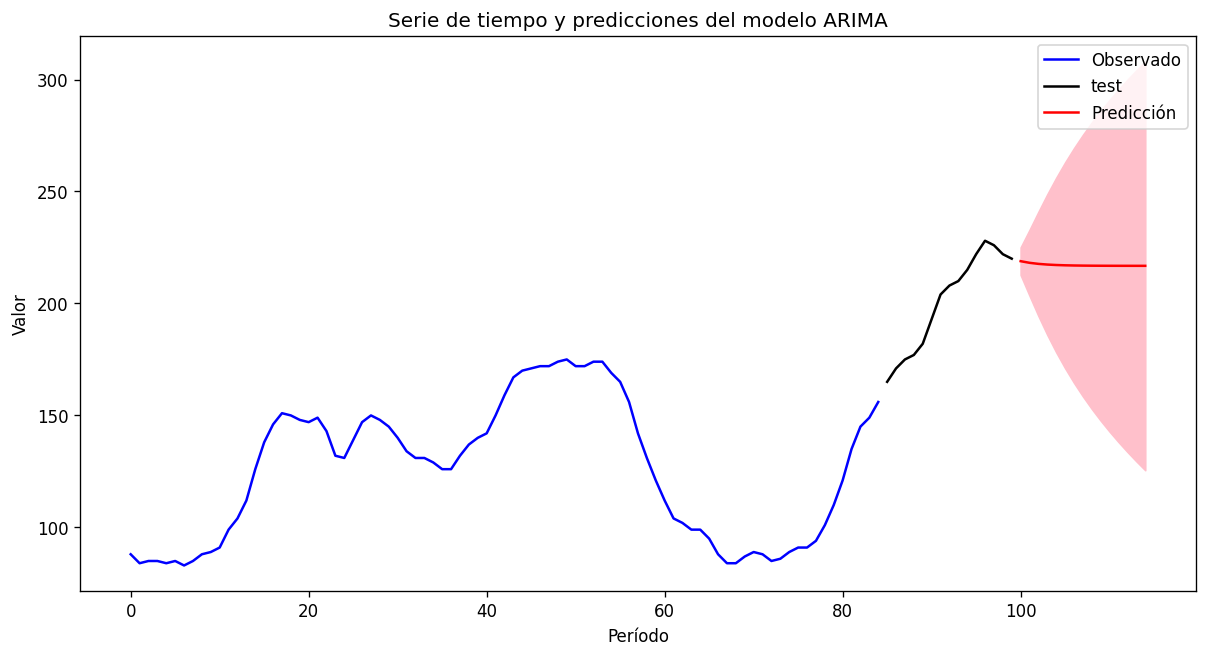

In [73]:
# Graficar la serie de tiempo y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(train, label='Observado', color='blue')
plt.plot(test, label='test', color='black')
plt.plot(forecast_summary['mean'], label='Predicción', color='red')

# Rellenar el área entre los intervalos de confianza
plt.fill_between(forecast_summary.index, forecast_summary['mean_ci_lower'], forecast_summary['mean_ci_upper'], color='pink')

plt.title('Serie de tiempo y predicciones del modelo ARIMA')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [61]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -214.430
Date:                Mon, 23 Oct 2023   AIC                            438.860
Time:                        03:05:23   BIC                            450.954
Sample:                             0   HQIC                           443.719
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1365      0.132      8.605      0.000       0.878       1.395
ar.L2         -0.5883      0.151     -3.896      0.000      -0.884      -0.292
ar.L3          0.3022      0.128      2.359      0.0

In [63]:
result = fitted.forecast(15, alpha=0.05)

In [68]:
result=pd.DataFrame(result)

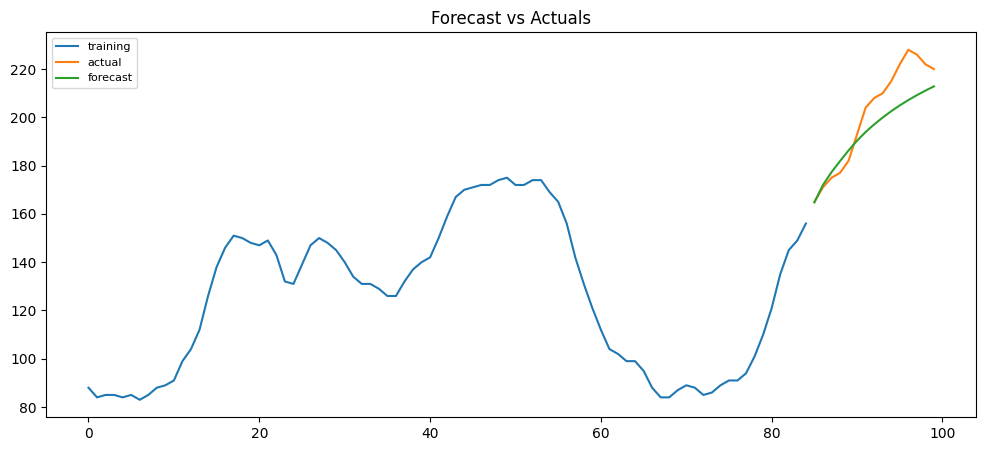

In [74]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(result, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [75]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())



Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.14 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.11 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.22 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.21 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

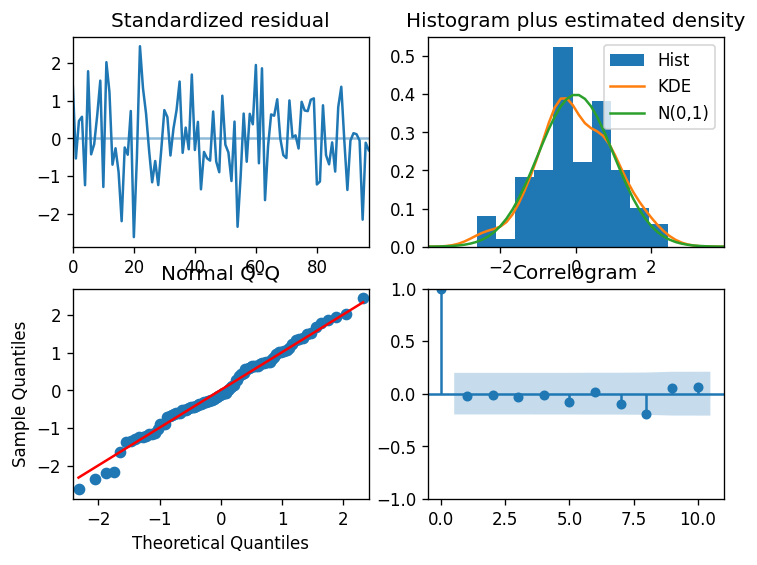

In [77]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

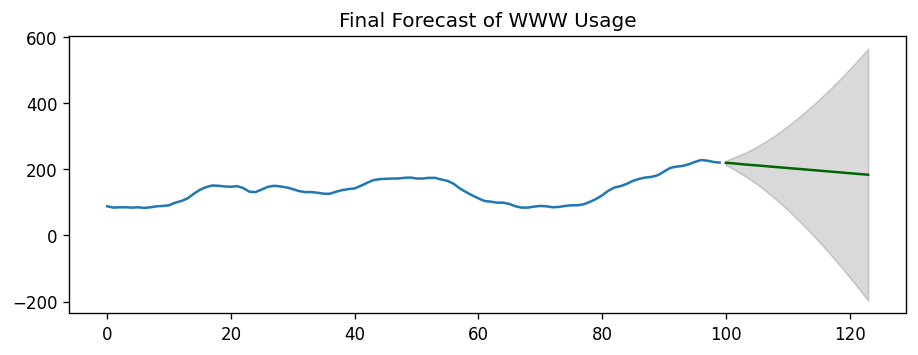

In [78]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [79]:
fc

100    219.397177
101    218.273261
102    216.399223
103    214.561386
104    213.063466
105    211.637251
106    210.079726
107    208.456737
108    206.874735
109    205.332153
110    203.781673
111    202.211785
112    200.640371
113    199.077118
114    197.516642
115    195.953285
116    194.387961
117    192.823400
118    191.259903
119    189.696343
120    188.132299
121    186.568157
122    185.004204
123    183.440342
dtype: float64

#SARIMA EN PYTHON

In [82]:
# Import
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')


In [83]:
data.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


<Axes: xlabel='date'>

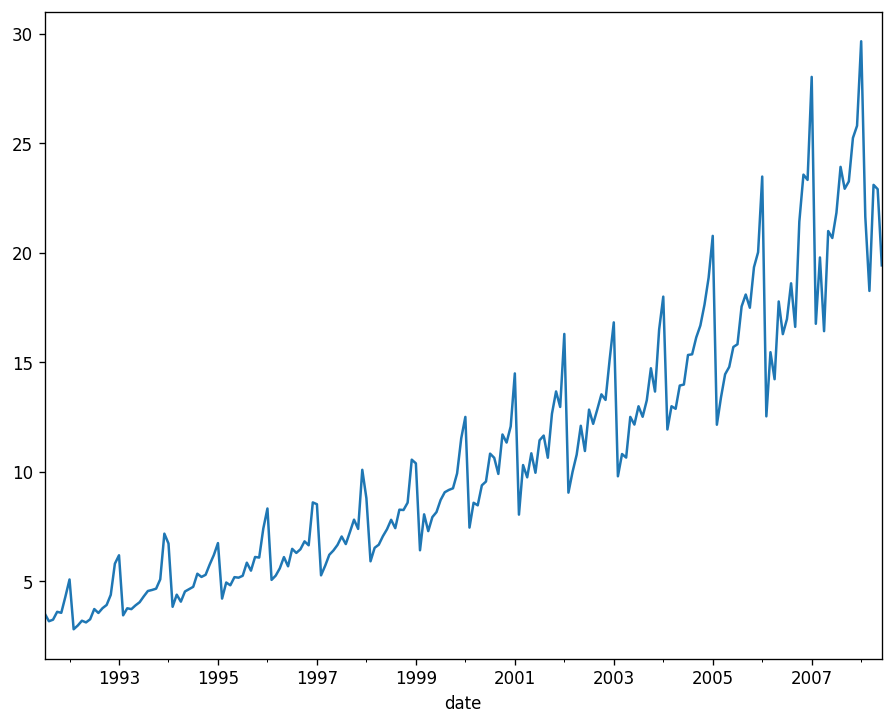

In [85]:
data['value'].plot()

<Axes: xlabel='date'>

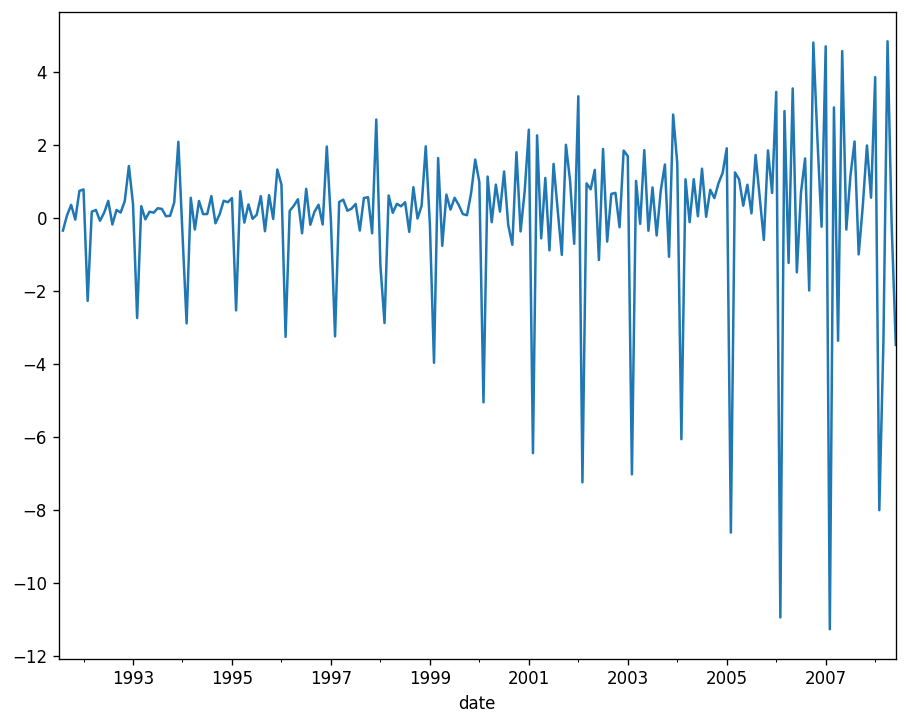

In [86]:
data['value'].diff().plot()

<Axes: xlabel='date'>

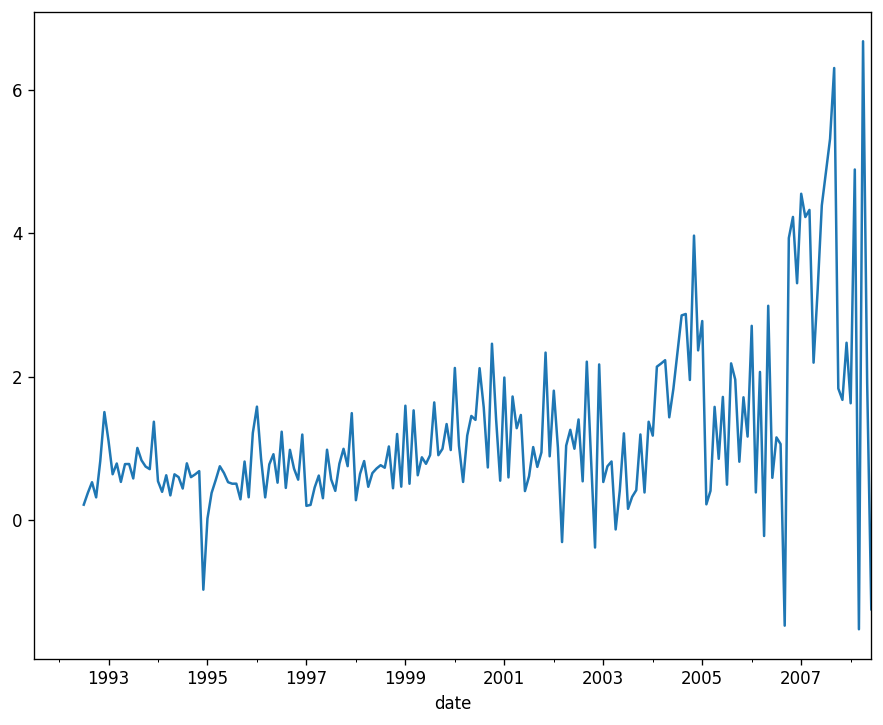

In [87]:
data['value'].diff(12).plot()

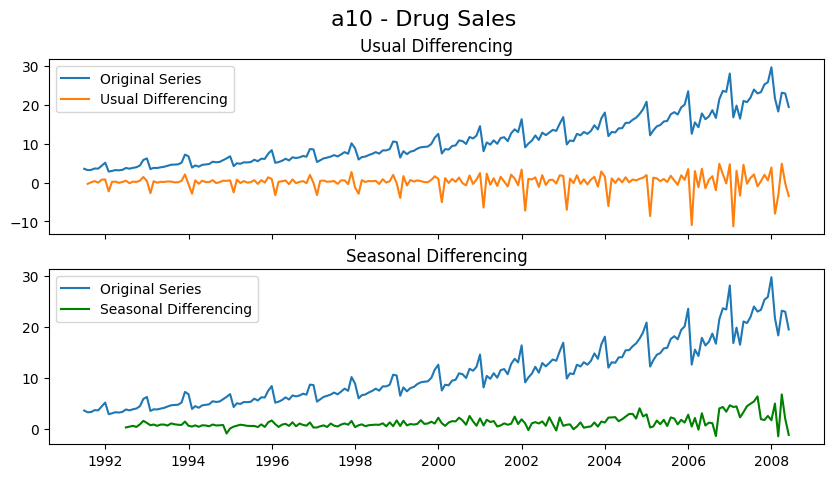

In [84]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [88]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=2.72 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.50 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.08 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.77 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=4.33 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=5.35 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=1.36 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.743, Time=7.47 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.36 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=1.32 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.36 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.64 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -254.036
Date:                            Mon, 23 Oct 2023   AIC                            524.072
Time:                                    03:26:54   BIC                            550.132
Sample:                                07-01-1991   HQIC                           534.627
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0052      0.009      0.559      0.576      -0.013       0.023
ar.L1          0.9755      0.019     52.230      0.000       0.939       1.012
ma.L1         -0.8952      0.057    -15.831      0.000      -1.006      -0.784
ma.L2          0.2065      0.058      3.585      0.000       0.094       0.319
ar.S.L12       0.8442      0.174      4.862      0.000       0.504       1.185
ma.S.L12      -1.5510      0.192     -8.097      0.000      -1.926      -1.176
ma.S.L24       0.7250      0.112      6.454      0.000       0.505       0.945
sigma2         0.7593      0.063     12.047      0.000       0.636       0.883
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):               143.35
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):              14.51   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

In [93]:
# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

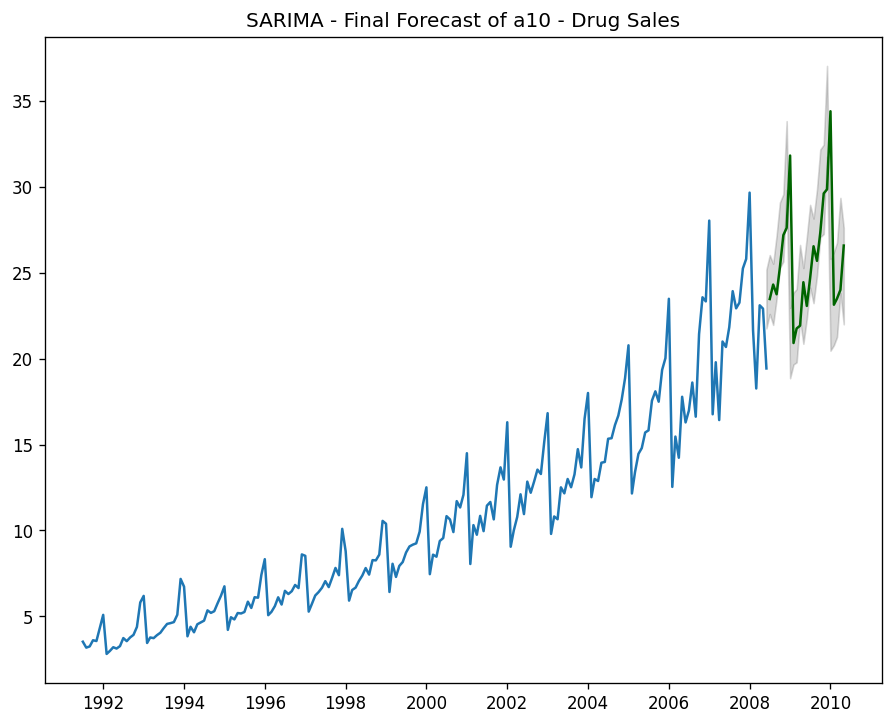

In [94]:
# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

# Cómo construir un modelo SARIMAX con variable exógena

El modelo SARIMA que hemos construido es bueno y típicamente podríamos detenernos aquí. Sin embargo, por completitud, vamos a intentar incluir un predictor externo, también llamado 'variable exógena', en el modelo. Este modelo se llama modelo SARIMAX.

El único requisito para usar una variable exógena es que debes conocer el valor de la variable durante el período de pronóstico.

Para fines de demostración, voy a utilizar el índice estacional de la descomposición estacional clásica de los últimos 36 meses de datos.

¿Por qué el índice estacional? ¿No está modelando SARIMA ya la estacionalidad, te preguntas?

Tienes razón.

Pero también quiero ver cómo se ve el modelo si forzamos el patrón estacional reciente en el entrenamiento y el pronóstico.

En segundo lugar, esta es una buena variable para fines de demostración. Puedes utilizar esto como una plantilla y agregar tus propias variables al código. El índice estacional es una buena variable exógena porque se repite en cada ciclo de frecuencia, en este caso, cada 12 meses.

Por lo tanto, siempre sabrás qué valores tendrá el índice estacional en los pronósticos futuros.

In [98]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative',
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

In [96]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=2.74 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.89 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.72 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.06 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.73 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=5.36 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=4.65 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=1.36 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.743, Time=7.50 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.35 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=1.30 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.40 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.68 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -254.036
Date:                            Mon, 23 Oct 2023   AIC                            524.072
Time:                                    03:36:38   BIC                            550.132
Sample:                                07-01-1991   HQIC                           534.627
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0052      0.009      0.559      0.576      -0.013       0.023
ar.L1          0.9755      0.019     52.230      0.000       0.939       1.012
ma.L1         -0.8952      0.057    -15.831      0.000      -1.006      -0.784
ma.L2          0.2065      0.058      3.585      0.000       0.094       0.319
ar.S.L12       0.8442      0.174      4.862      0.000       0.504       1.185
ma.S.L12      -1.5510      0.192     -8.097      0.000      -1.926      -1.176
ma.S.L24       0.7250      0.112      6.454      0.000       0.505       0.945
sigma2         0.7593      0.063     12.047      0.000       0.636       0.883
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):               143.35
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):              14.51   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

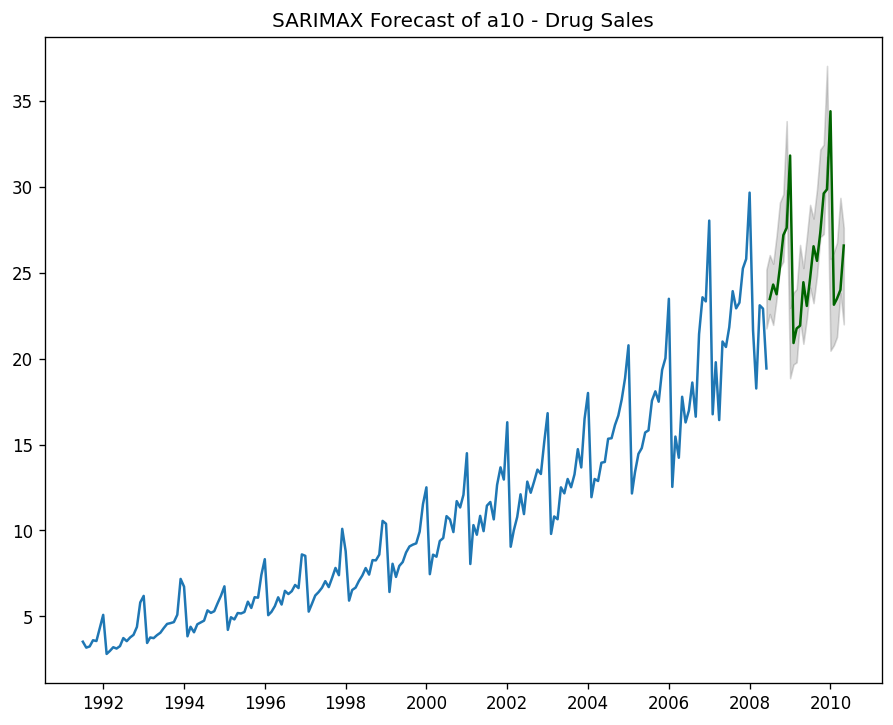

In [100]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods,
                                  exogenous=np.tile(seasonal_index['seasonal'], 2).reshape(-1,1),
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()